In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from astropy.timeseries import LombScargle
from astropy.time import Time
from datetime import datetime, timedelta

In [3]:
# Leer el archivo 'test.txt'
df = pd.read_csv("test.txt", delimiter="\t", names=["time", "v_mag"])

# Eliminar filas con valores NaN
df = df.dropna()

In [4]:
df["time_minutos"] = df['time'].apply(lambda x: convertir_tiempo_a_minutos(x,22))
df["time_minutos"]= df["time_minutos"] - df["time_minutos"].iloc[0]


datetime.datetime(2024, 11, 30, 22, 1, 1)

Text(0, 0.5, 'Vmag')

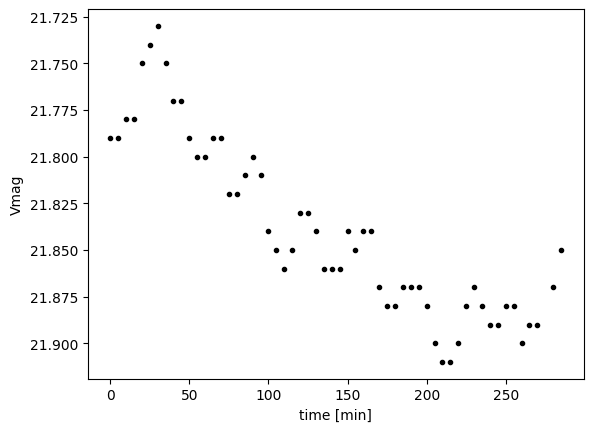

In [250]:
plt.plot(df["time_minutos"],df["v_mag"],"k.")
plt.gca().invert_yaxis()
plt.xlabel("time [min]")
plt.ylabel("Vmag")

In [14]:
import pandas as pd
from datetime import datetime

def convertir_tiempo_a_minutos(tiempo,hora_inicial):
    """
    Convierte un tiempo en formato HH:MM:SS a minutos totales.
    
    Parámetros:
    tiempo (str): Tiempo en formato HH:MM:SS.
    
    Retorna:
    float: Tiempo convertido a minutos totales.
    """
    tiempo_dt = datetime.strptime(tiempo, '%H:%M:%S')
    minutos = tiempo_dt.hour * 60 + tiempo_dt.minute + tiempo_dt.second / 60  # Convertir horas y segundos a minutos
    if tiempo_dt.hour < hora_inicial:
        minutos = minutos + 24 *60
        
    return minutos



In [198]:
# for the moment use the g band
def doperiod(df, method,f_min,f_max):
    objperiod = {}
    freq = {}
    per = {}
    my_per = P4J.periodogram(method=method) # 'PDM1', 'LKSL', 'MHAOV', 'QMICS', 'QMIEU'
    my_per.set_data(np.array(df["time_minutos"].values), np.array(df["v_mag"].values),np.ones(len(df)))
    my_per.frequency_grid_evaluation(fmin=f_min, fmax=f_max, fresolution=1e-5)
    my_per.finetune_best_frequencies(fresolution=1e-5, n_local_optima=1)          
    freq, per = my_per.get_periodogram()
    fbest, pbest = my_per.get_best_frequencies()
    objperiod = 1. / fbest
    print(objperiod)

    period = objperiod

    return period, freq, per

In [199]:
#frecuencia minima, periodo maximo. 
f_min = 1/(df["time_minutos"].max()/2)
f_max = 1/(2*5) #delta t 5

[14.826236]
[139.12956]
[10.128814]
[10.133945]


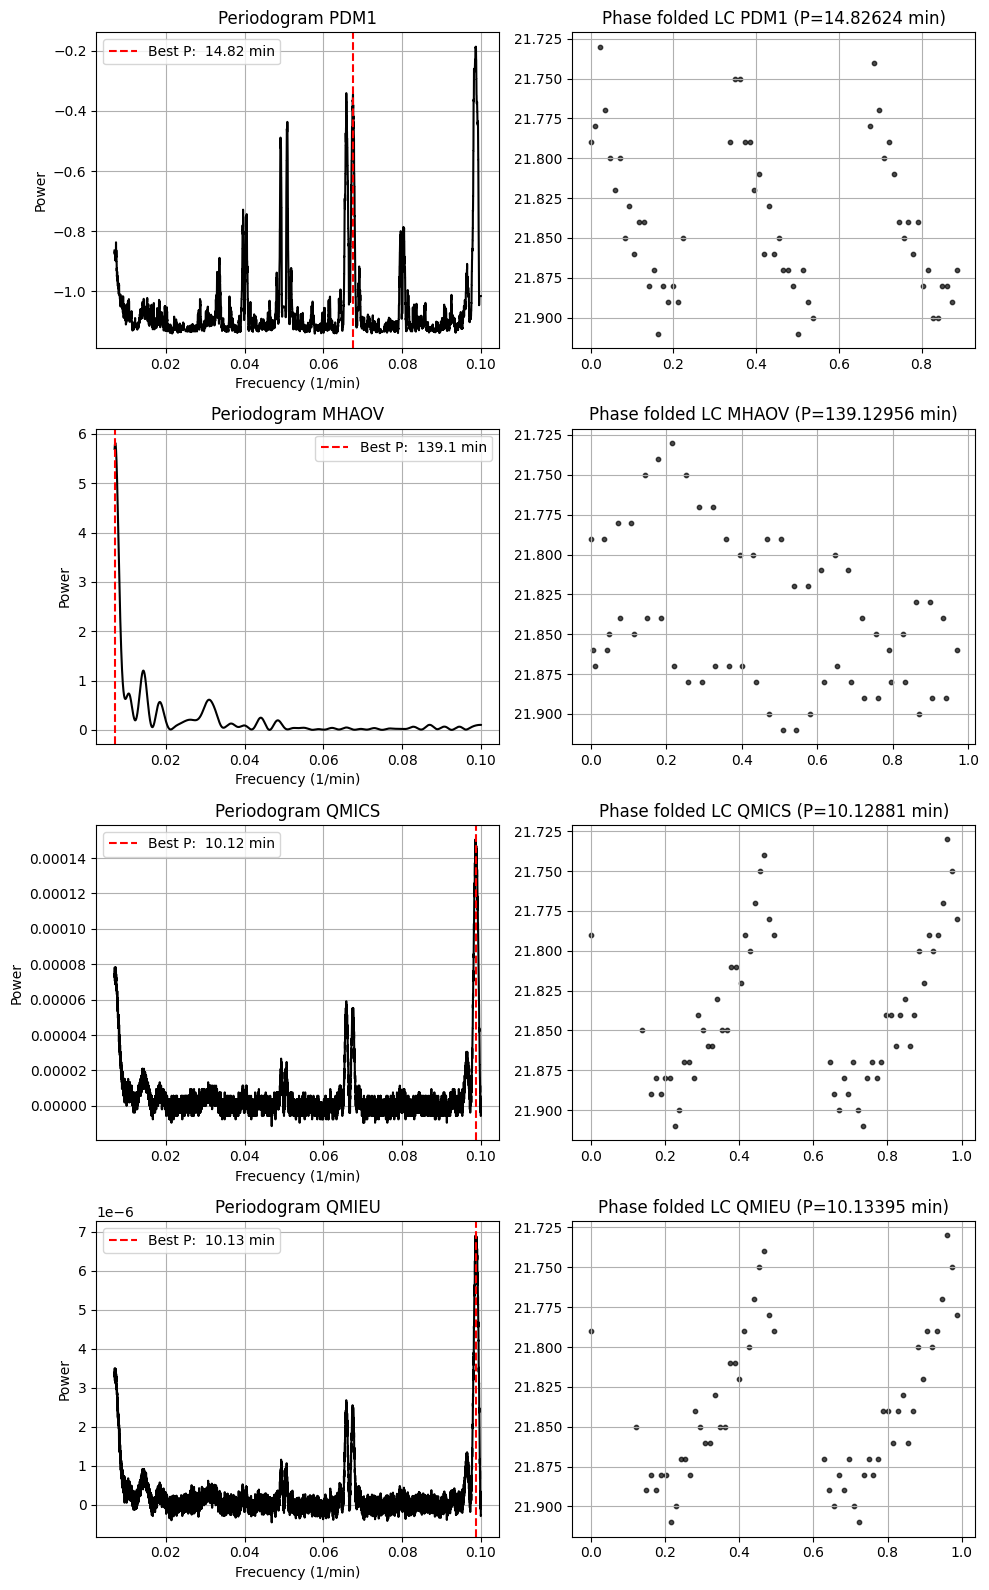

In [246]:
import numpy as np
import matplotlib.pyplot as plt

methods = ['PDM1', 'MHAOV', 'QMICS', 'QMIEU']
n_methods = len(methods)

# Crear la figura antes del bucle: 
# n_methods filas, 2 columnas (periodograma y fase)
fig, axs = plt.subplots(n_methods, 2, figsize=(10, 4*n_methods))

# Asegurar que axs sea un array bidimensional incluso si es un solo método
if n_methods == 1:
    axs = np.array([axs])

for i, method in enumerate(methods):
    try:
        periodo, freq, per = doperiod(df, method, f_min, f_max)

        # Graficar el periodograma en la primera columna (axs[i,0])
        axs[i,0].plot(freq, per, 'k-')
        print_best_period = np.round(periodo[0],2)
        axs[i,0].axvline(1/periodo, color='r', linestyle='--', label=f'Best P:  {str(periodo[0])[:5]} min')
        axs[i,0].set_xlabel('Frecuency (1/min)')
        axs[i,0].set_ylabel('Power')
        axs[i,0].set_title(f'Periodogram {method}')
        axs[i,0].legend()
        axs[i,0].grid(True)

        # Curva de luz en fase en la segunda columna (axs[i,1])
        time = df["time_minutos"].values
        flux = df["v_mag"].values

        phase = (time % periodo) / periodo
        axs[i,1].scatter(phase, flux, s=10, alpha=0.7, color='black')
        axs[i,1].set_title(f'Phase folded LC {method} (P={periodo[0]:.5f} min)')
        axs[i,1].grid(True)
        axs[i,1].invert_yaxis()

    except Exception as e:
        # Si ocurre algún error, podemos marcarlo en la figura o simplemente continuar.
        axs[i,0].text(0.5, 0.5, f'Error con {method}', ha='center', va='center', color='red', transform=axs[i,0].transAxes)
        axs[i,1].text(0.5, 0.5, 'Sin datos', ha='center', va='center', color='red', transform=axs[i,1].transAxes)
        continue

plt.tight_layout()

# Guardar la figura completa en un solo PDF
plt.savefig("resultado_todos_metodos.pdf")

plt.show()




In [253]:
2/f_min

np.float64(285.0)

In [239]:
1/f_max

10.0